In [1]:
# !pip install mlbox

# importing the MLBox

In [2]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [3]:
paths = ["train_regression.csv", "test_regression.csv"]
target_name = "SalePrice"

# reading and cleaning all files 

In [4]:
rd = Reader(sep = ',')
df = rd.train_test_split(paths, target_name)


reading csv : train_regression.csv ...
cleaning data ...
CPU time: 5.0292510986328125 seconds

reading csv : test_regression.csv ...
cleaning data ...
CPU time: 0.36618709564208984 seconds

> Number of common features : 80

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 43
> Number of numerical features: 37
> Number of training samples : 1460
> Number of test samples : 1459

> Top sparse features (% missing values on train set):
PoolQC         99.5
MiscFeature    96.3
Alley          93.8
Fence          80.8
FireplaceQu    47.3
dtype: float64

> Task : regression
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [5]:
dft = Drift_thresholder()
df = dft.fit_transform(df)


computing drifts ...
CPU time: 1.6412029266357422 seconds

> Top 10 drifts

('Id', 1.0)
('WoodDeckSF', 0.07229032410850289)
('MoSold', 0.04795235249010199)
('FireplaceQu', 0.045570511122591695)
('HeatingQC', 0.03630341627881295)
('OverallCond', 0.03548900585635284)
('MSZoning', 0.032161347143937036)
('BedroomAbvGr', 0.031234817589703034)
('BsmtCond', 0.03095249200675121)
('GarageCars', 0.03067363246011867)

> Deleted variables : ['Id']
> Drift coefficients dumped into directory : save


# tuning

In [6]:
mape = make_scorer(lambda y_true, y_pred: 100*np.sum(np.abs(y_true-y_pred)/y_true)/len(y_true), greater_is_better=False, needs_proba=False)
opt = Optimiser(scoring = mape, n_folds = 3)

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


In [7]:
opt.evaluate(None, df)

No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}


MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.724280495125964
VARIANCE : 0.8209723498000103 (fold 1 = -10.46930111453782, fold 2 = -10.122939172213853, fold 3 = -8.

-9.724280495125964

In [8]:
space = {
    
        'ne__numerical_strategy':{"search":"choice",
                                 "space":[0]},
        'ce__strategy':{"search":"choice",
                        "space":["label_encoding","random_projection", "entity_embedding"]}, 
        'fs__threshold':{"search":"uniform",
                        "space":[0.01,0.3]},    
        'est__max_depth':{"search":"choice",
                                  "space":[3,4,5,6,7]}
    
        }

best = opt.optimise(space, df, 15)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.26430168011148086}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353915657655.10846, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212966893949.54153, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293134499324.19495, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.836742941421443
VARIANCE : 0.6367157766887346 (fold 1 = -10.456580893887686, fold 2 = -10.092475054587384, fold 3 = -8.961172875789256)
CPU time: 2.64178204536438 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.22928998816948698}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 4, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsampl

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471225444478.4418, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326975675602.66797, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438354339080.5868, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.282328725389611
VARIANCE : 0.8541879700437228 (fold 1 = -10.127450089983373, fold 2 = -9.607285963668222, fold 3 = -8.112250122517239)
CPU time: 39.37928223609924 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.09270866480321314}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 4, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsamp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353915657655.10846, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212966893949.54153, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293134499324.19495, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.2409414298038
VARIANCE : 0.8277893850780693 (fold 1 = -9.881506790775173, fold 2 = -9.769251651017512, fold 3 = -8.072065847618717)
CPU time: 2.5914292335510254 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.1083189033526859}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 6, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_for

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382002478925.43506, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226417788336.04807, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326095800873.17474, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.631691486293262
VARIANCE : 0.8606447810803596 (fold 1 = -10.333544724159404, fold 2 = -10.141935978797342, fold 3 = -8.419593755923039)
CPU time: 2.376553535461426 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.11955159247496298}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsamp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471225444478.4418, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326975675602.66797, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438354339080.5868, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.440061879796753
VARIANCE : 0.6819123718539665 (fold 1 = -10.075179535541652, fold 2 = -9.7509741306957, fold 3 = -8.494031973152909)
CPU time: 3.7162134647369385 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.09897907159324179}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_f

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382002478925.43506, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226417788336.04807, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326095800873.17474, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.527850652672093
VARIANCE : 0.748468415180394 (fold 1 = -10.111006355753933, fold 2 = -10.0012920964802, fold 3 = -8.471253505782148)
CPU time: 1.8388803005218506 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.18842951382459724}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471225444478.4418, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326975675602.66797, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438354339080.5868, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.210279276566622
VARIANCE : 0.8011157492863012 (fold 1 = -10.111563541408536, fold 2 = -9.354149272779813, fold 3 = -8.165125015511517)
CPU time: 3.1587255001068115 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.1022786155563871}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382002478925.43506, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226417788336.04807, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326095800873.17474, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.606049522257477
VARIANCE : 0.8543602843294994 (fold 1 = -10.33575579384662, fold 2 = -10.07518907891409, fold 3 = -8.407203694011718)
CPU time: 2.2978031635284424 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'random_projection'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2566304864369076}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsampl

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 353915657655.10846, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212966893949.54153, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293134499324.19495, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.927512863408197
VARIANCE : 0.5812102553560737 (fold 1 = -10.456580893887686, fold 2 = -10.207747887064777, fold 3 = -9.118209809272129)
CPU time: 2.6043779850006104 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.07682038102585875}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsam

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471225444478.4418, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326975675602.66797, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438354339080.5868, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.440061879796753
VARIANCE : 0.6819123718539665 (fold 1 = -10.075179535541652, fold 2 = -9.7509741306957, fold 3 = -8.494031973152909)
CPU time: 3.6686012744903564 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2752107909365114}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471225444478.4418, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326975675602.66797, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438354339080.5868, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.210279276566622
VARIANCE : 0.8011157492863012 (fold 1 = -10.111563541408536, fold 2 = -9.354149272779813, fold 3 = -8.165125015511517)
CPU time: 3.205854654312134 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.29441796353351124}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 4, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382002478925.43506, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226417788336.04807, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326095800873.17474, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.787481770359555
VARIANCE : 0.6769765278715222 (fold 1 = -10.350695952286156, fold 2 = -10.176350754950809, fold 3 = -8.835398603841702)
CPU time: 1.7764685153961182 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.04962871775698552}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 6, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsam

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471225444478.4418, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326975675602.66797, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438354339080.5868, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.465585438309464
VARIANCE : 0.727757073192398 (fold 1 = -10.132829198695632, fold 2 = -9.810590745562951, fold 3 = -8.45333637066981)
CPU time: 3.9724392890930176 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.08579001887596717}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 6, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471225444478.4418, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326975675602.66797, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438354339080.5868, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.465585438309464
VARIANCE : 0.727757073192398 (fold 1 = -10.132829198695632, fold 2 = -9.810590745562951, fold 3 = -8.45333637066981)
CPU time: 3.8327488899230957 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 0, 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'entity_embedding'}
>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.10450876756041048}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 6, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 0.9, 'subsample

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471225444478.4418, tolerance: 577337156.9466883
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326975675602.66797, tolerance: 630960719.5801489
  positive)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438354339080.5868, tolerance: 633252671.051735
  positive)



MEAN SCORE : make_scorer(<lambda>, greater_is_better=False) = -9.465585438309464
VARIANCE : 0.727757073192398 (fold 1 = -10.132829198695632, fold 2 = -9.810590745562951, fold 3 = -8.45333637066981)
CPU time: 3.792813777923584 seconds
100%|██████████| 15/15 [01:21<00:00,  5.40s/trial, best loss: 9.210279276566622]


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ BEST HYPER-PARAMETERS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

{'ce__strategy': 'entity_embedding', 'est__max_depth': 3, 'fs__threshold': 0.18842951382459724, 'ne__numerical_strategy': 0}



fitting the pipeline ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641663248876.6576, tolerance: 920791133.4609975
  positive)


CPU time: 14.150985956192017 seconds


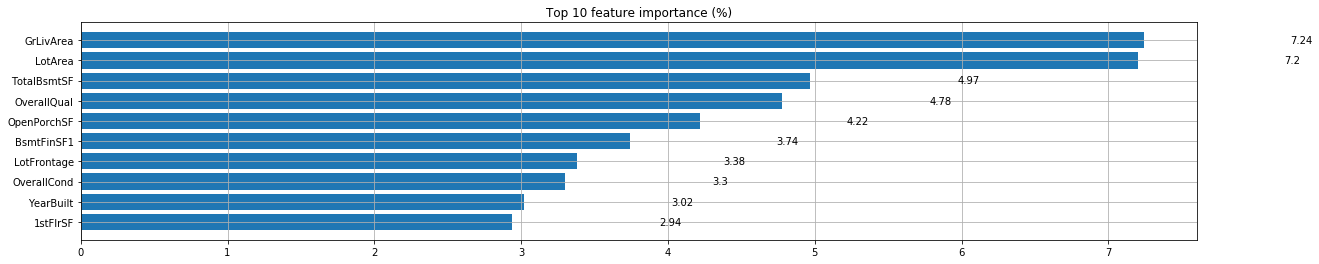


> Feature importances dumped into directory : save

predicting...
CPU time: 0.2955892086029053 seconds

> Overview on predictions : 

   SalePrice_predicted
0        120250.256821
1        171549.394037
2        193930.754478
3        196128.686632
4        187093.612047
5        173933.768324
6        175816.568271
7        164552.642796
8        188768.471386
9        125033.779669

dumping predictions into directory : save ...


In [9]:
prd = Predictor()
prd.fit_predict(best, df)